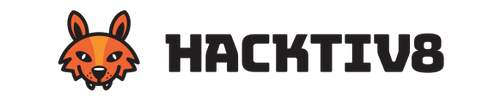

# Assignment 3 - Bank Marketing Dataset

Naurah Nadzifah Azizi

PYTN-KS11-003

# Project Overview

Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

BANK CLIENT DATA:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown') 

#relate with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

#social and economic context attributes:

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desire target):**
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

View the top 5 rows of data

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


View the bottom 5 rows of data

In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


View all columns and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

View the number of data rows and columns

In [6]:
df.shape

(41188, 21)

View the header list

In [7]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

view unique columns in Age

In [8]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

Displays a list of columns with the object data type (string or category) of a DataFrame df along with the unique values of each column

In [9]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


## Data Cleaning

Check missing value

In [10]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df = df[df!='unknown']
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [13]:
df = df.dropna()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Count duplicate data

In [15]:
df.duplicated().sum()

10

In [16]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Visualization Data

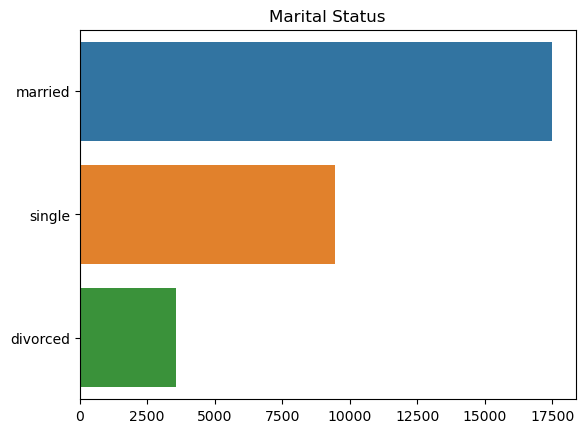

In [17]:
sns.barplot(df['marital'].value_counts().values, df['marital'].value_counts().index, data=df)
plt.title('Marital Status')
plt.show()

Text(0.5, 1.0, 'Histogram of Age')

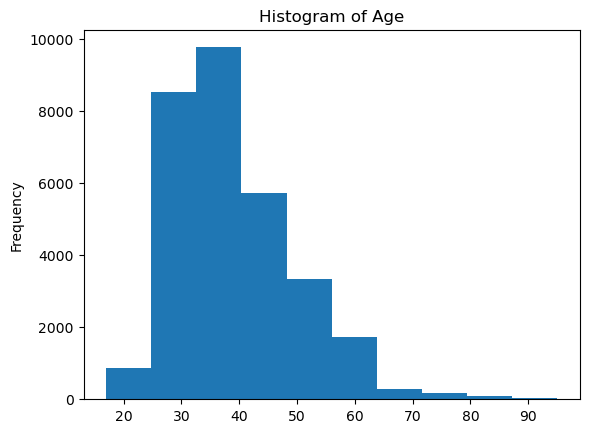

In [18]:
df['age'].plot(kind='hist')
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Persentage of Loan Status')

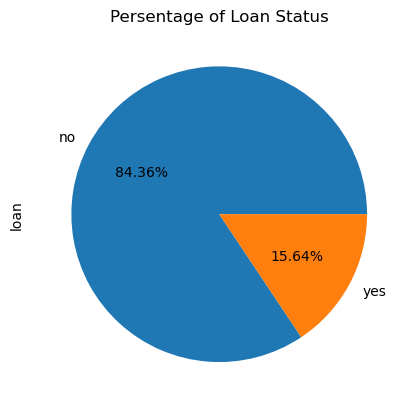

In [19]:
df['loan'].value_counts().plot(kind='pie',
                    autopct ='%1.2f%%',)
plt.title('Persentage of Loan Status')

## Data Preprocessing

Encoding category type data

In [20]:
data = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in data:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Split data for train and test data

In [21]:
y = df.iloc[:,-1]
X = df.iloc[:,0:20]

30% data test and 70% data train

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2024)

## Modelling

### Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
print('Test data accuracy', lr.score(X_test, y_test))

Test data accuracy 0.9009511315185307


Check for confusion matrix Logistic Regression Model

In [25]:
y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
matrix1 = confusion_matrix(y_test, y_pred_lr)
print(matrix1)

0.9009511315185307
[[7768  258]
 [ 648  473]]


Visualize the confusion matrix Logistic Regression Model

<function matplotlib.pyplot.show(close=None, block=None)>

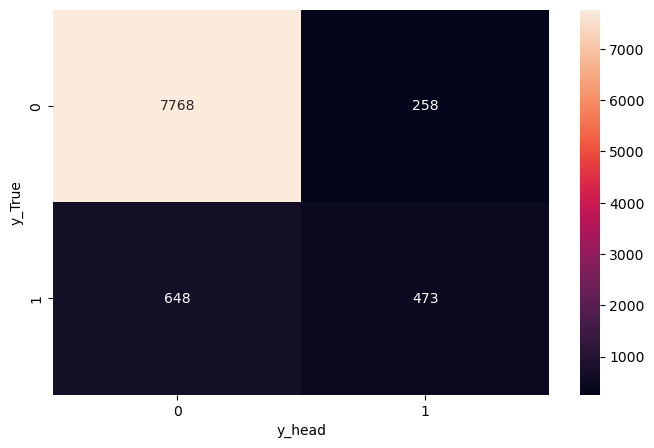

In [26]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix1, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

Metrics Performance for Logistic Regression Model

In [27]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8026
           1       0.65      0.42      0.51      1121

    accuracy                           0.90      9147
   macro avg       0.79      0.69      0.73      9147
weighted avg       0.89      0.90      0.89      9147



Metrics Performance for Logistic Regression Model

In [28]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8026
           1       0.65      0.42      0.51      1121

    accuracy                           0.90      9147
   macro avg       0.79      0.69      0.73      9147
weighted avg       0.89      0.90      0.89      9147



### K-Nearest Neighbors

Bulding and fitting KNN Model

In [29]:
KNN = KNeighborsClassifier(n_neighbors=50)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [30]:
print('Test data accuracy', KNN.score(X_test, y_test))

Test data accuracy 0.9018257352137313


Check for confusion matrix KNN Model

In [31]:
y_pred_kn = KNN.predict(X_test)
print(accuracy_score(y_test, y_pred_kn))
matrix2 = confusion_matrix(y_test, y_pred_kn)
print(matrix2)

0.9018257352137313
[[7681  345]
 [ 553  568]]


Visualize the confusion matrix KNN Model

<function matplotlib.pyplot.show(close=None, block=None)>

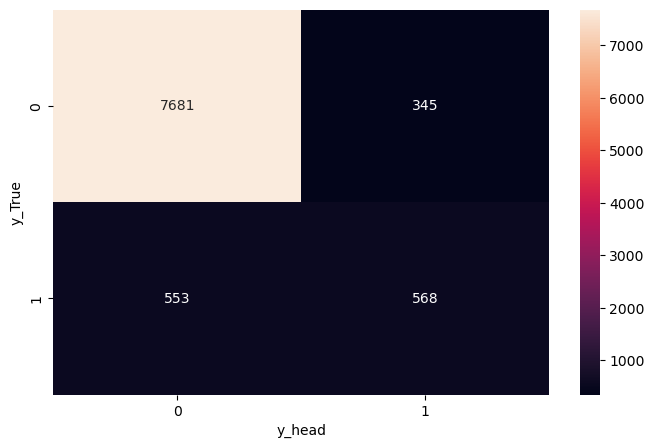

In [32]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix2, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

Metrics Performance for KNN Model

In [33]:
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8026
           1       0.62      0.51      0.56      1121

    accuracy                           0.90      9147
   macro avg       0.78      0.73      0.75      9147
weighted avg       0.89      0.90      0.90      9147



### 

### Support Vector Machine

Building SVM model

In [34]:
svm_model = SVC()

Fitting SVM model

In [35]:
svm_model.fit(X_train, y_train)

SVC()

Check for accuracy SVM model with test data

In [36]:
print('Test data accuracy', svm_model.score(X_test, y_test))

Test data accuracy 0.8893626325571226


Check for confusion matrix SVM Model

In [37]:
y_pred_sv = svm_model.predict(X_test)
print(accuracy_score(y_test, y_pred_sv))
matrix3 = confusion_matrix(y_test, y_pred_sv)
print(matrix3)

0.8893626325571226
[[7880  146]
 [ 866  255]]


Visualize the confusion matrix SVM Model

<function matplotlib.pyplot.show(close=None, block=None)>

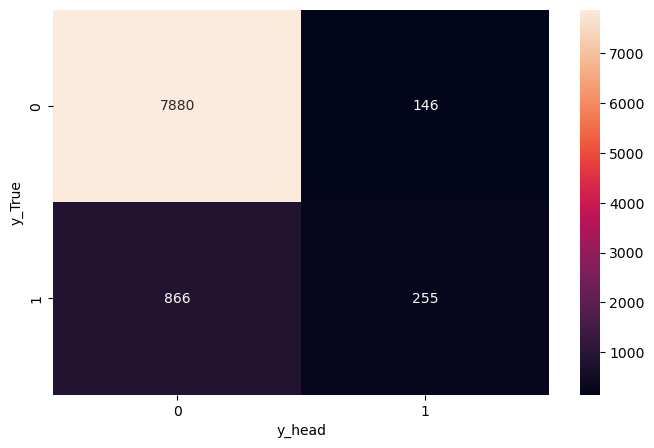

In [38]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix3, annot=True, fmt='.0f', ax=ax)
plt.xlabel('y_head')
plt.ylabel('y_True')
plt.show

Metrics Performance for SVM Model

In [39]:
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8026
           1       0.64      0.23      0.34      1121

    accuracy                           0.89      9147
   macro avg       0.77      0.60      0.64      9147
weighted avg       0.87      0.89      0.87      9147



### Decision Tree

Building and fitting Decision Tree Model

In [40]:
decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Check for accuracy Decision Tree model with test data

In [41]:
print('Test data accuracy', decisiontree.score(X_test, y_test))

Test data accuracy 0.9030283152946321


Check for confusion matrix Decision Tree Model

In [42]:
y_pred_dt = decisiontree.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))
matrix4 = confusion_matrix(y_test, y_pred_dt)
print(matrix4)

0.9030283152946321
[[7599  427]
 [ 460  661]]


Visualize the confusion matrix Decision Tree Model

<function matplotlib.pyplot.show(close=None, block=None)>

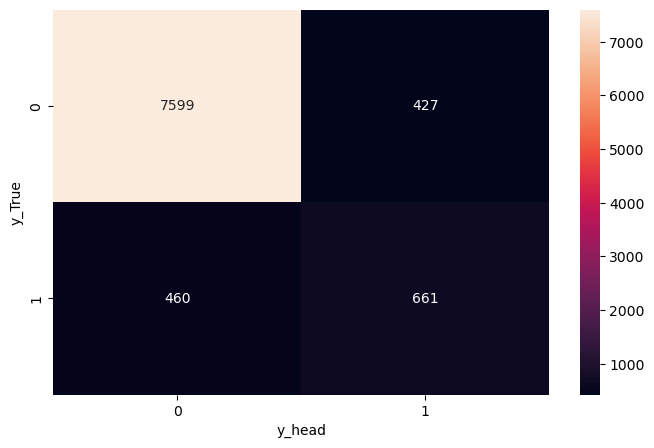

In [43]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix4, annot=True, fmt='.0f', ax=ax)
plt.xlabel('y_head')
plt.ylabel('y_True')
plt.show

Metrics Performance for Decision Tree Model

In [44]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8026
           1       0.61      0.59      0.60      1121

    accuracy                           0.90      9147
   macro avg       0.78      0.77      0.77      9147
weighted avg       0.90      0.90      0.90      9147



### Random Forest

Building and fitting Random Forest Model

In [45]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)

RandomForestClassifier()

Check for accuracy Random Forest model with test data

In [46]:
print('Test data accuracy', randomforest.score(X_test, y_test))

Test data accuracy 0.9035749426041325


Check for confusion matrix Random Forest Model

In [47]:
y_pred_rf = randomforest.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
matrix5 = confusion_matrix(y_test, y_pred_rf)
print(matrix5)

0.9035749426041325
[[7674  352]
 [ 530  591]]


Visualize the confusion matrix Random Forest Model

<function matplotlib.pyplot.show(close=None, block=None)>

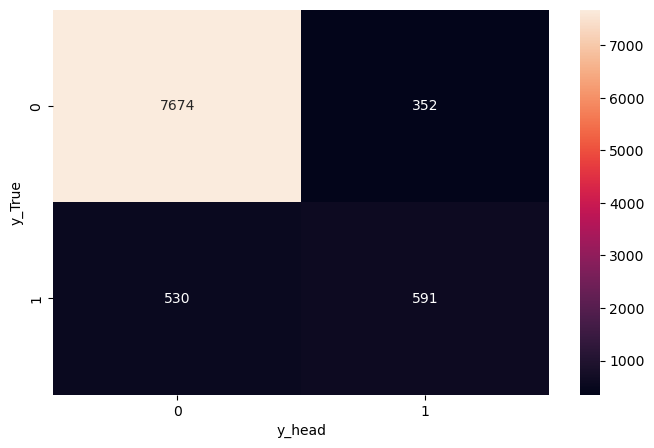

In [48]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix5, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

Metrics Performance for Random Forest Model

In [49]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8026
           1       0.63      0.53      0.57      1121

    accuracy                           0.90      9147
   macro avg       0.78      0.74      0.76      9147
weighted avg       0.90      0.90      0.90      9147



### Naive Bayes

Building and fitting Naive Bayes Model

In [50]:
naivebayes = GaussianNB()
naivebayes.fit(X_train, y_train)

GaussianNB()

Check for accuracy Naive Bayes model with test data

In [51]:
print('Test data accuracy', naivebayes.score(X_test, y_test))

Test data accuracy 0.824204657264677


Check for confusion matrix Naive Bayes Model

In [52]:
y_pred_nb = naivebayes.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))
matrix6 = confusion_matrix(y_test, y_pred_nb)
print(matrix6)

0.824204657264677
[[6822 1204]
 [ 404  717]]


Visualize the confusion matrix Naive Bayes Model

<function matplotlib.pyplot.show(close=None, block=None)>

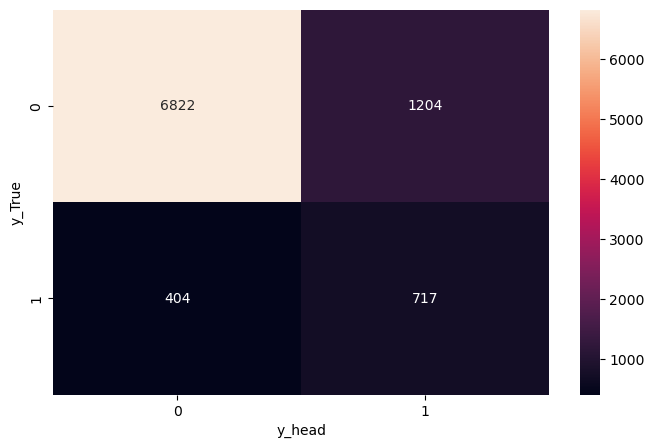

In [53]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix6, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

Metrics Performance for Random Forest Model

In [54]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      8026
           1       0.37      0.64      0.47      1121

    accuracy                           0.82      9147
   macro avg       0.66      0.74      0.68      9147
weighted avg       0.87      0.82      0.84      9147



#### Conclusion

In [55]:
print('Accuracy Score')
print('Logistic Regression:',accuracy_score(y_test, y_pred_lr))
print('K-Nearest Neighbors:',accuracy_score(y_test, y_pred_kn))
print('Support Vector Machine:',accuracy_score(y_test, y_pred_sv))
print('Decision Tree:',accuracy_score(y_test, y_pred_dt))
print('Random Forest:',accuracy_score(y_test, y_pred_rf))
print('Naive Bayes:',accuracy_score(y_test, y_pred_nb))

Accuracy Score
Logistic Regression: 0.9009511315185307
K-Nearest Neighbors: 0.9018257352137313
Support Vector Machine: 0.8893626325571226
Decision Tree: 0.9030283152946321
Random Forest: 0.9035749426041325
Naive Bayes: 0.824204657264677


Based on the fitting model and training model classification that has been done, it is found that the highest accuracy rate is in the Random Forest model which is 90.57%